**Di Luo**

Spring 2020

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov
import pca_svd

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: Implement PCA using singular value decomposition (SVD)

Implement and test the following methods necessary to perform PCA in `pca_svd.py`.

- `pca`: Perform PCA on the data using the SVD approach.

### 3a) Test SVD PCA with Iris dataset

- Load in the Iris dataset.
- Create a `PCA_SVD` object called `pca`, based on the iris data.

In [2]:
# Create PCA_SVD object here
iris_data = pd.read_csv('data/iris.csv')
pca = pca_svd.PCA_SVD(iris_data)

In [3]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.9246187232017271, 0.977685206318795, 0.9947878161267247, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659  0.58203  0.31549]
 [-0.08452 -0.73016 -0.59791 -0.31972]
 [ 0.85667  0.17337 -0.07624 -0.47984]
 [ 0.35829  0.07548 -0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

#### Verify PCA projection

- Project the data onto the first two principal components, then create a scatter plot below showing the results.

Your scatterplot should look exactly like the one you made using the covariance matrix approach to PCA.

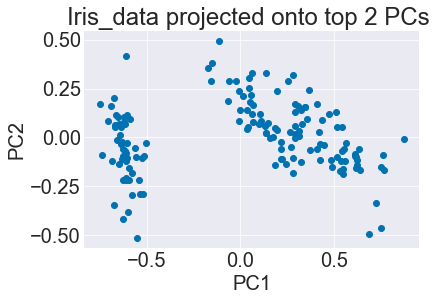

In [4]:
# Normalization
pca.pca(iris_headers, True)

A_proj = pca.pca_project([0,1])
plt.scatter(A_proj[:,0], A_proj[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris_data projected onto top 2 PCs ')
plt.show()

## Task 4: Eigenfaces. Perform PCA on face images using the SVD method

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [5]:
face_imgs = np.load('data/lfwcrop.npy')
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 4b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html13231
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

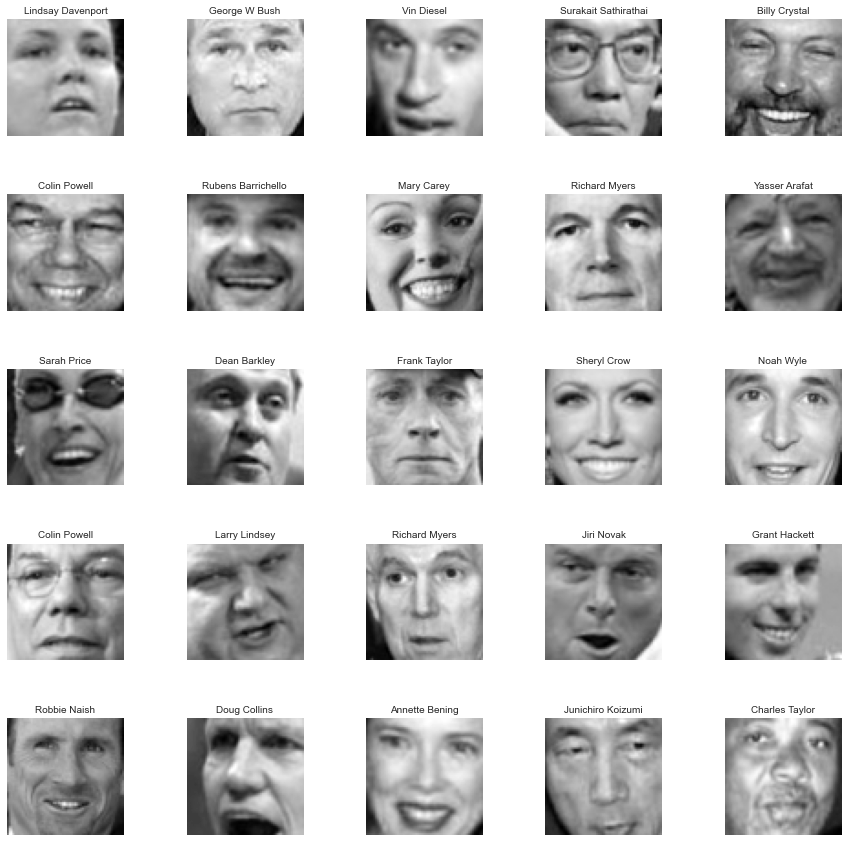

In [6]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize = (15,15))
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    
    n = 0
    
    for i in range(5):
        for j in range(5):
            ax[i,j].imshow(face_imgs[n],cmap=plt.get_cmap('gray'))
            ax[i,j].set_yticks([])
            ax[i,j].set_xticks([])
            ax[i,j].set_title(face_names[n], size = 10)
            n += 1

face_plot(face_imgs, face_names)

### 4c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

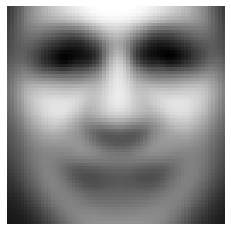

In [7]:
mean_face = np.sum(face_imgs, axis=0)/len(face_imgs)
plt.imshow(mean_face,cmap=plt.get_cmap('gray'))
plt.yticks([])
plt.xticks([])
plt.show()

**Question 6:** What does the "mean face" image represent?

**Question 6 answer:** It represents the average shape of all faces, which is composed by the average of all pictures in each pixel.

### 4d) Preprocess face data

Currently, the face data has shape = `(13231, 64, 64)`. To run PCA, we'll need to "unravel" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.

- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [8]:
# Your reshape code here
face_imgs_vec = face_imgs.reshape(face_imgs.shape[0], face_imgs.shape[1]*face_imgs.shape[2])
print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 4e) Perform PCA (SVD) on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_SVD` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [9]:
import time

face_df = pd.DataFrame(face_imgs_vec)
print(face_df.columns)

pca = pca_svd.PCA_SVD(face_df)

var = np.arange(4096)

# start time
start = time.time()

pca.pca(var)

# End time
end = time.time()

print(f'Time taken is {end-start} seconds.')


RangeIndex(start=0, stop=4096, step=1)
Time taken is 93.57068681716919 seconds.


### 4f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

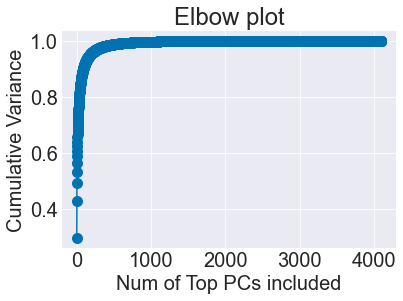

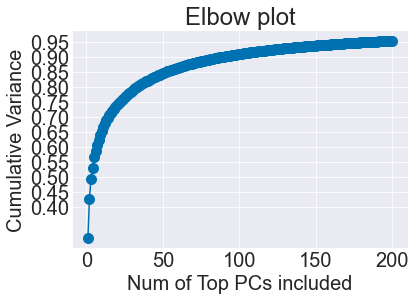

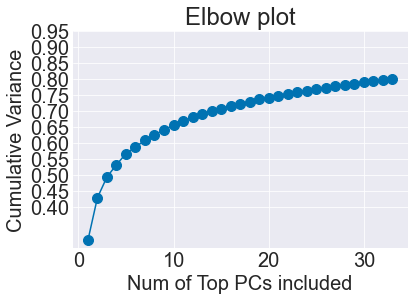

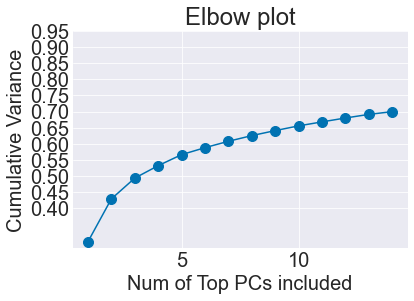

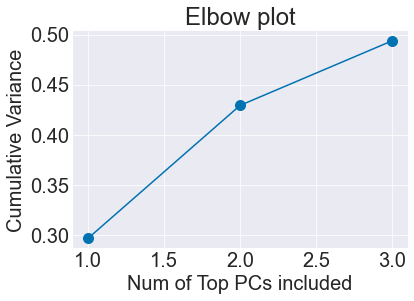

In [10]:
pca.elbow_plot()
plt.show()

# Reasonable number can be 200

pca.elbow_plot(200)
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.show()

pca.elbow_plot(33)
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.show()

pca.elbow_plot(14)
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.show()

pca.elbow_plot(3)
plt.show()

### 4g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [11]:
# Number of PCs for each cumulative proportion: 50% is 3, 70% is 14, 80% is 33, 95% is 200.
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    d1,d2 = reconstucted_imgs.shape
    
    d3 = int(np.sqrt(d2))
    
    orig_imgs = reconstucted_imgs.reshape(d1,d3,d3)
    
    return orig_imgs


#### 50% variance face grid

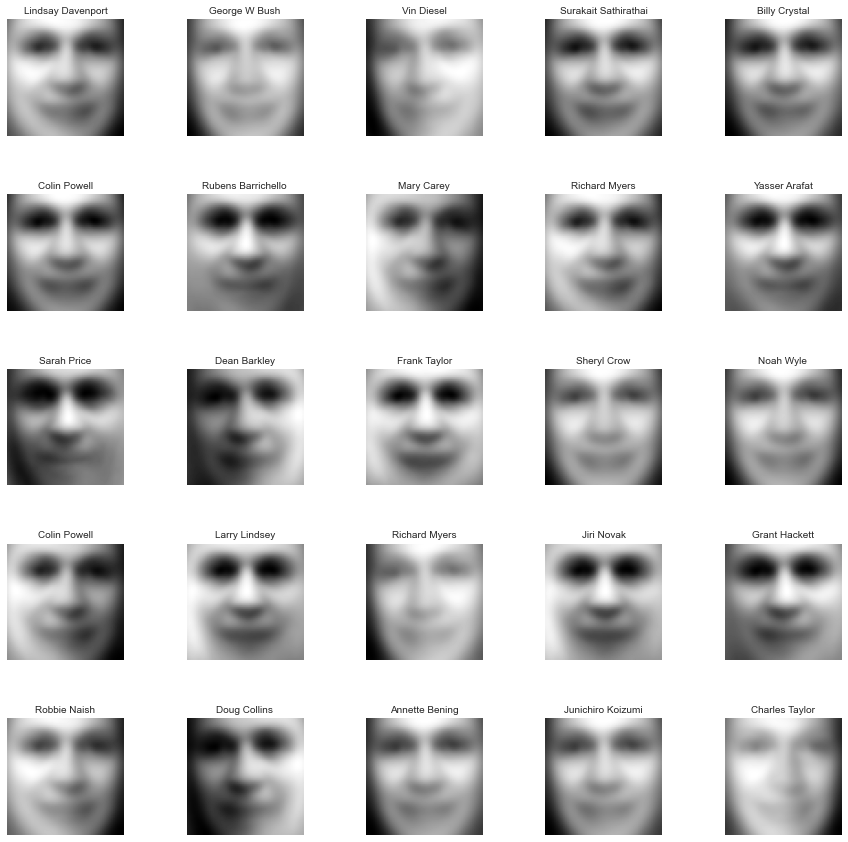

In [12]:
reconstucted_imgs = pca.pca_then_project_back(3)

ori = make_imgs(reconstucted_imgs)

face_plot(ori, face_names)

#### 70% variance face grid

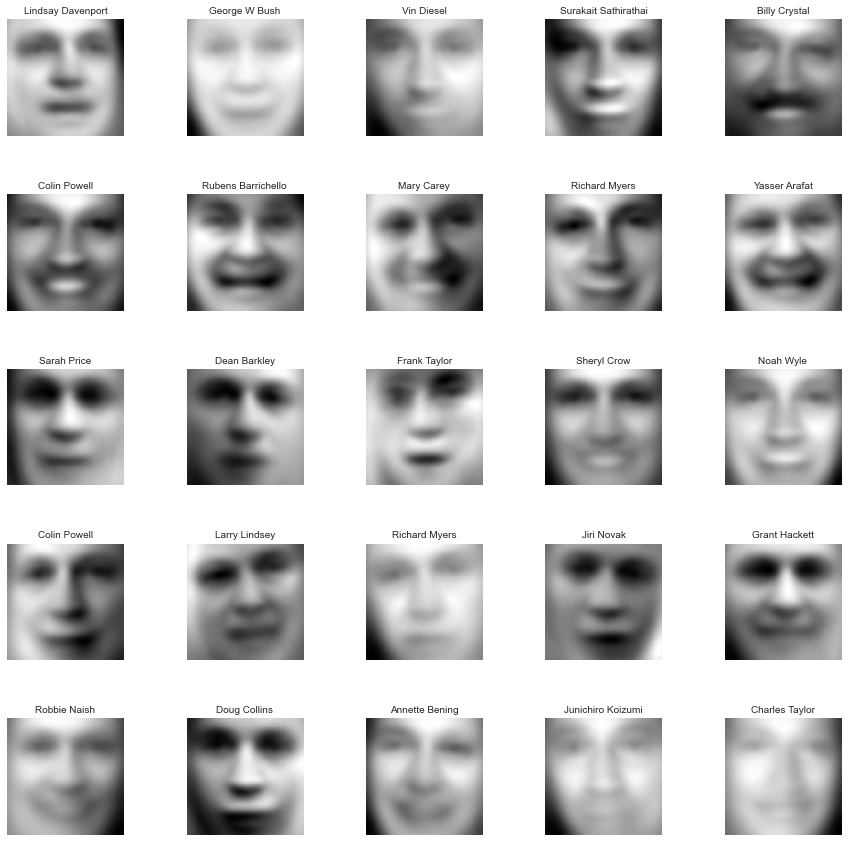

In [13]:
reconstucted_imgs = pca.pca_then_project_back(14)

ori = make_imgs(reconstucted_imgs)

face_plot(ori, face_names)

#### 80% variance face grid

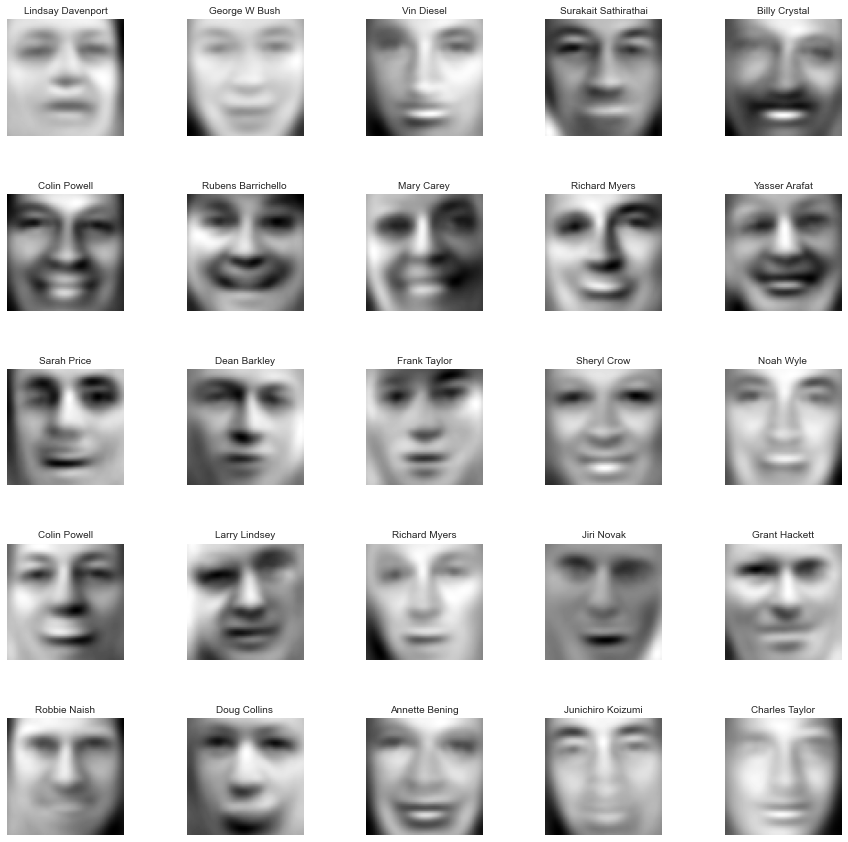

In [14]:
reconstucted_imgs = pca.pca_then_project_back(33)

ori = make_imgs(reconstucted_imgs)

face_plot(ori, face_names)

#### 95% variance face grid

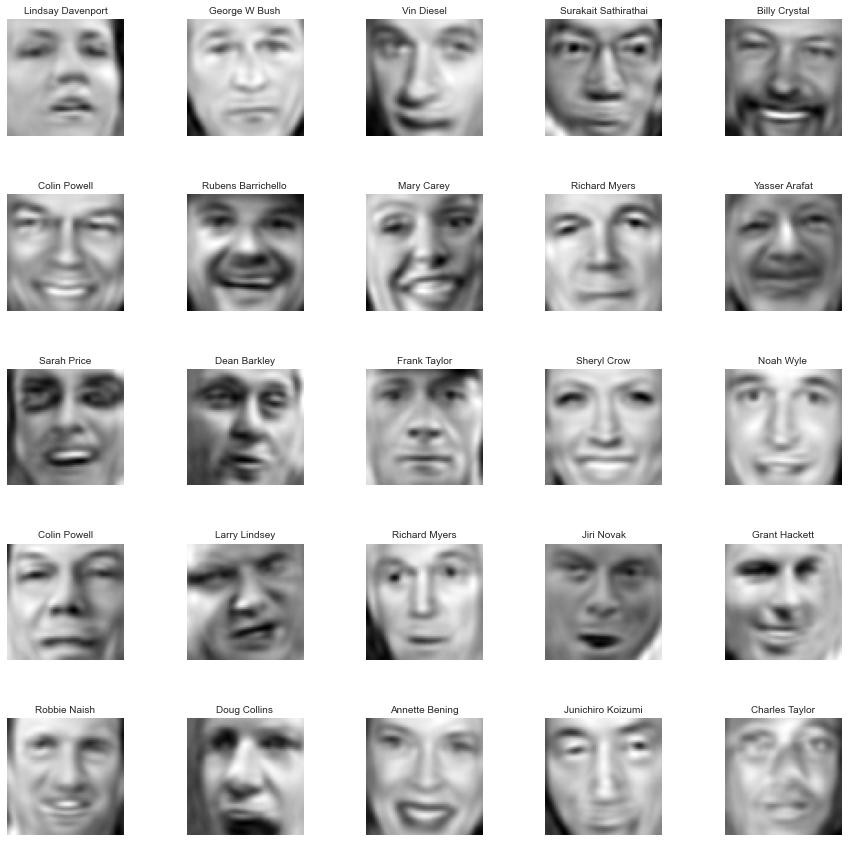

In [15]:
reconstucted_imgs = pca.pca_then_project_back(200)

ori = make_imgs(reconstucted_imgs)

face_plot(ori, face_names)

**Question 7:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Question 7 answer:** 50% variance face grid shows a very general shape of each faces and these faces highly resemble the mean face. 70% and 80% variance face grid shows faces with more details, such as the emotion on each face. 95% variance face grid shows almost all the details on each face.

## Task 5: Compare covariance matrix and SVD approaches on the face dataset

### 5a) Time comparison with covariance matrix method

- In the cell below, run PCA on the face data using the convariance matrix method. Time the processing time in `pca` using the `time` module, like you did in Task 4 with SVD. 

In [16]:
pca2 = pca_cov.PCA_COV(face_df)

var = np.arange(4096)

# start time
start = time.time()

pca2.pca(var)

# End time
end = time.time()

print(f'Time taken with COV is {end-start} seconds.')


Time taken with COV is 39.57848811149597 seconds.


**Question 8:** How many seconds did it take to process the face dataset with the covariance method? How about with the SVD method? **Include both numbers, along with units**.

**Question 8 answer:** Covariance method takes around 40 seconds and SVD method takes around 94 seconds.

### 5b) Stability comparison

- In the cell below, sum up the **absolute differences** in the eigenvalues obtained from the two approaches. Print out the resulting float value.
- In the cell below, sum up the **differences** in the **absolute values of the eigenvectors** obtained from the two approaches. Print out the resulting float value.

In [17]:
diff_evals = np.sum(np.abs(pca2.get_eigenvalues() - pca.get_eigenvalues()))
print(f'Sum of abs values of differences in eigenvalues is {diff_evals}.')

diff_evecs = np.sum(np.abs(pca2.get_eigenvectors() - pca.get_eigenvectors()))
print(f'Sum of abs values of differences in eigenvectors is {diff_evecs}.')


Sum of abs values of differences in eigenvalues is 695.101423476458.
Sum of abs values of differences in eigenvectors is 268531.3206800816.


**Question 9:** If you consider SVD as producing the "correct" result, what do the above float value discrepencies obtained between the two methods mean?

**Question 9 answer:** The discrepencies mean that SVD method is more stable than COV method because SVD method doesn't compute covariance matrix. The computation of COV matrix increases a chance to make mistakes, which gives COV method "incorrect" result.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, loading plot, proportion variance explained, etc) to inform your analysis and exploration. 
- Do PCA and SVD based PCA yield different results?

For this extension, I decide to continue investigating the nutrient dataset from https://data.world/exercises/principal-components-exercise-1 that shows the nutrient of different kinds of food. In addition to the variables I examed in pca_cov section, I will expand the number of variables or select some of the variables on purpose to investigate the relationship between them. The dataset can be accessed with the URL https://query.data.world/s/m6ifncjtf6ycdujh7k6rufl5yu6yhy

The numerical variables are: Energy_kcal, Protein_g, Fat_g, Carb_g, Sugar_g, Fiber_g, VitA_mcg, VitB6_mg, VitB12_mcg, VitC_mg, VitE_mg, Folate_mcg, Niacin_mg, Riboflavin_mg, Thiamin_mg, Calcium_mg, Copper_mcg, Iron_mg, Magnesium_mg, Manganese_mg, Phosphorus_mg, Selenium_mcg, Zinc_mg, VitA_USRDA, VitB6_USRDA, VitB12_USRDA, VitC_USRDA, VitE_USRDA, Folate_USRDA, Niacin_USRDA, Riboflavin_USRDA, Thiamin_USRDA, Calcium_USRDA, Copper_USRDA, Magnesium_USRDA, Phosphorus_USRDA, Selenium_USRDA, Zinc_USRDA. The variables include some general nutrilogical data that we commonly see in our life like energy and protein. More scientifical data, like the amount of different vitamins or chemical elements are also included.

Some variables like energy and protein has normal units like kcal and g, while some others ending with _USRDA are unclear. I searched online and found the definition of USRDA: A version of the figures for recommended daily allowances used by the United States Food and Drug Administration for the legal regulation of food labelling in the United States. The values, based on RDAs, are expressed in percentages and are used for all persons over four years old. (Source: https://www.oxfordreference.com/view/10.1093/acref/9780198568506.001.0001/acref-9780198568506-e-7569) These data are highly correlated with the amount of each nutrient, which are also included in data, so I decide to drop the ones ending with _USRDA for simplicity.

To begin with, I will have all numerical variables that I want as input and conduct PCA on the data. I start with PCA with COV method and enable normalization.

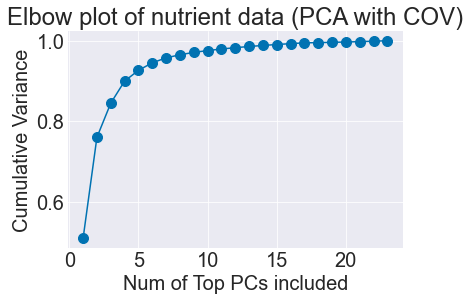

In [25]:
nutr_data = pd.read_csv('https://query.data.world/s/m6ifncjtf6ycdujh7k6rufl5yu6yhy')
nutr_pca_cov = pca_cov.PCA_COV(nutr_data)

nutr_vars = ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 
             'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 
             'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 
             'Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 
             'Zinc_mg']

nutr_pca_cov.pca(nutr_vars, True)

# elbow plot
nutr_pca_cov.elbow_plot()
plt.title('Elbow plot of nutrient data (PCA with COV)')
plt.show()

The first 4 PCs account for around 90% of the cumulative variance, so I decide to preserve top 4 PCs.

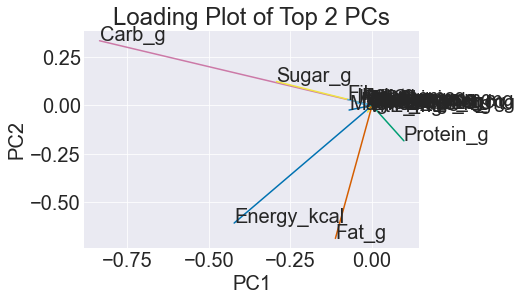

In [28]:
# Loading plot of the 1st two PCs, PC1 and PC2
nutr_pca_cov.loading_plot()
plt.show()

From the loading plot, we can see that energy and fat are highly correlated, which fits our common sense that food with more fat has higher energy. Carb and sugar are highly correlated, which also fits our common sense as sugar is one of the main forms of carbohydrate.

In addition, we can see that PC1 is positively correlated with protein and negatively correlated with carb, sugar, energy, and fat.

PC2 is positively correlated with carb ad sugar, and negatively correlated with energy and fat.


For the next part, I implemented loading_plot_generic(self, pc_a, pc_b) in pca_cov.py to create a loading plot of any of 2 in all PC eigenvectors, instead of the top 2 in loading_plot().

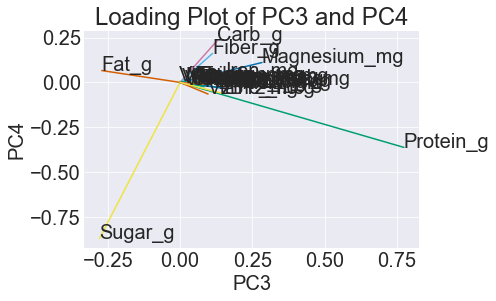

In [31]:
# Loading plot of PC3 and PC4
nutr_pca_cov.loading_plot_generic(3,4)
plt.show()

From the loading plot, we can see that carb and fiber are highly correlated, which is because fiber is a type of carbonhydrate.

Fat is negatively correlated with protein.

In addition, we can see that PC3 is positively correlated with protein, magnesium and negatively correlated with fat and sugar.

PC4 is positively correlated with carb and fiber, and negatively correlated with sugar and protein.

**Then I tried to use SVD based PCA**

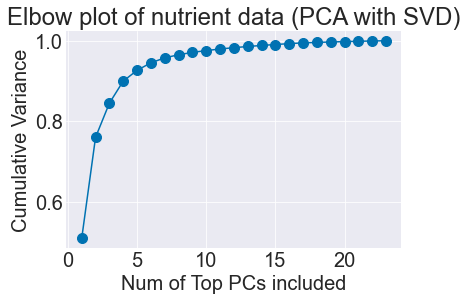

In [40]:
nutr_pca_svd = pca_svd.PCA_SVD(nutr_data)

nutr_pca_svd.pca(nutr_vars, True)

# elbow plot
nutr_pca_svd.elbow_plot()
plt.title('Elbow plot of nutrient data (PCA with SVD)')
plt.show()

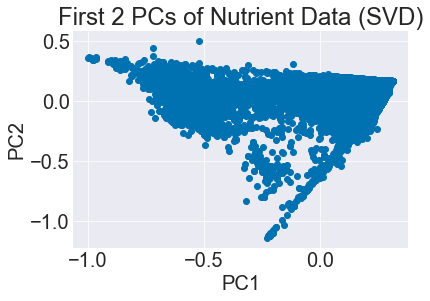

In [42]:
# Visualization (plot) of PCA projected data on 1st two PCs. with SVD
nutr_pc2 = nutr_pca_svd.pca_project([0,1])

plt.scatter(nutr_pc2[:,0], nutr_pc2[:,1])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First 2 PCs of Nutrient Data (SVD)')

plt.show()

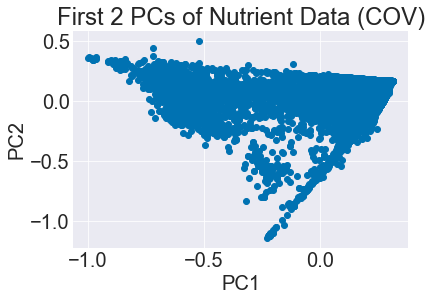

In [44]:
# Visualization (plot) of PCA projected data on 1st two PCs.
nutr_pc = nutr_pca_cov.pca_project([0,1])

plt.scatter(nutr_pc[:,0], nutr_pc[:,1])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First 2 PCs of Nutrient Data (COV)')

plt.show()

In [46]:
diff_evals = np.sum(np.abs(nutr_pca_cov.get_eigenvalues() - nutr_pca_svd.get_eigenvalues()))
print(f'Sum of abs values of differences in eigenvalues is {diff_evals}.')

diff_evecs = np.sum(np.abs(nutr_pca_cov.get_eigenvectors() - nutr_pca_svd.get_eigenvectors()))
print(f'Sum of abs values of differences in eigenvectors is {diff_evecs}.')


Sum of abs values of differences in eigenvalues is 0.0003856316970471334.
Sum of abs values of differences in eigenvectors is 78.73747122133867.


We can see that the difference between two methods are small, especially when compared with eigenface data.

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.